In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib
iris = load_iris()
iris.data.shape

(150, 4)

In [2]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, random_state = 42)
clusters = kmeans.fit_predict(iris.data)
kmeans.cluster_centers_.shape

(3, 4)

In [3]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(3):
    mask = (clusters == i)
labels[mask] = mode(iris.target[mask])[0]

In [4]:
#Accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(iris.target, labels)

0.5733333333333334

In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


mat = confusion_matrix(iris.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [6]:
#Implement tSNE

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init='random', random_state=42)
iris_proj = tsne.fit_transform(iris.data)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(iris_proj)

labels = np.zeros_like(clusters)
for i in range(3):
    mask = (clusters == i)
    labels[mask] = mode(iris.target[mask])[0]

accuracy_score(iris.target, labels)

0.9066666666666666

ready


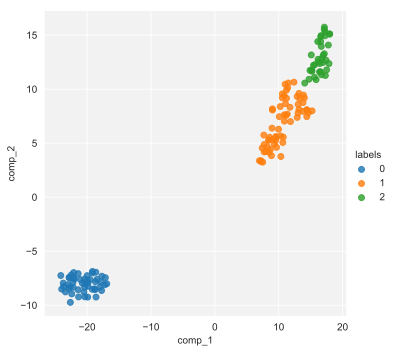

In [7]:
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

sns.set_style("darkgrid", {"axes.facecolor": ".95"})
%config InlineBackend.figure_format = 'svg'

matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
proj = pd.DataFrame(iris_proj)
proj.columns = ["comp_1", "comp_2"]
proj["labels"] = labels
sns.lmplot("comp_1", "comp_2", hue = "labels", data = proj.sample(150) ,fit_reg=False)
print("ready")